# Homework 4: Modeling Text Data

### Team Member 1:
* UNI:  asp2197
* Name: Abhay Pawar

### Team Member 2 [optional]:
* UNI:  vb2428
* Name: Vijayaraghavan Balaji


You can find the data here: https://data.boston.gov/dataset/vision-zero-entry

# Task1 - Data Cleaning  [10 points]

Load the data, visualize the class distribution. Clean up the target labels. Some categories have been arbitrarily split and need to be consolidated. 

In [1]:
# Add your code for task 1 here. You may use multiple cells. 
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
import gensim
import nltk
from nltk.corpus import stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk import word_tokenize,sent_tokenize
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from nltk import word_tokenize,sent_tokenize


G:\Program Files\Anaconda2\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


[nltk_data] Downloading package stopwords to C:\Users\Abhay
[nltk_data]     Pawar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
data = pd.read_csv("Vision_Zero_Entry.csv")

In [11]:
from collections import Counter
classcounts = Counter(data['REQUESTTYPE'])

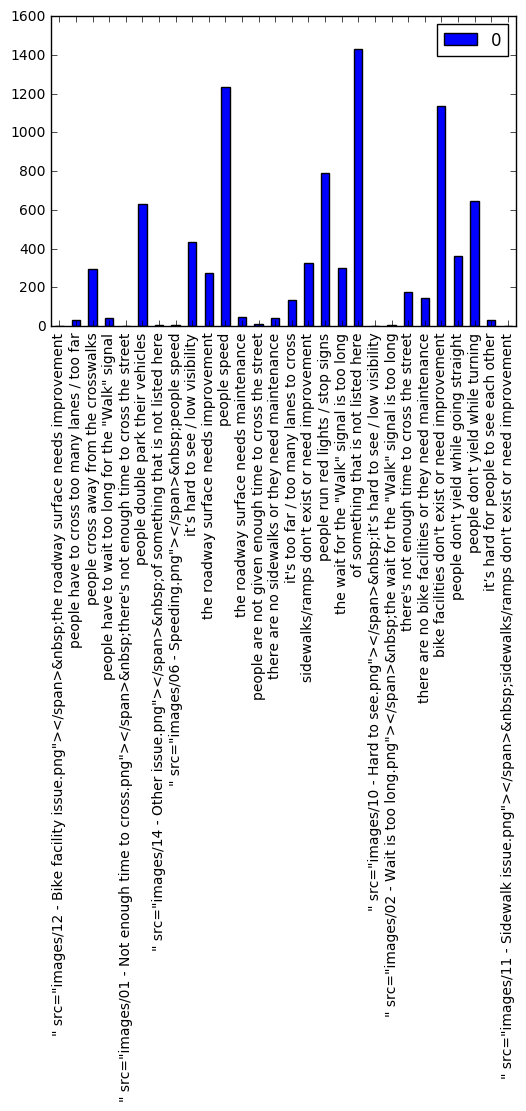

In [12]:
targetdf = pd.DataFrame.from_dict(classcounts,orient='index')
targetdf.plot(kind='bar')

In [13]:
data = data[~pd.isnull(data['COMMENTS'])]
data=data.drop_duplicates(subset=['REQUESTTYPE','COMMENTS']).reset_index(drop=True)

We clubbed some request type based on the text. If they are similar sematically, we have clubbed them. Following code does the clubbing. We finally have 12 request types.

In [14]:
temp = data['REQUESTTYPE'].copy()
temp[data['REQUESTTYPE'] == '" src="images/01 - Not enough time to cross.png"></span>&nbsp;there\'s not enough time to cross the street']="there's not enough time to cross the street"
temp[data['REQUESTTYPE'] == '" src="images/02 - Wait is too long.png"></span>&nbsp;the wait for the "Walk" signal is too long'] = 'the wait for the "Walk" signal is too long'
temp[data['REQUESTTYPE'] == '" src="images/06 - Speeding.png"></span>&nbsp;people speed']="people run red lights / stop signs"
temp[data['REQUESTTYPE'] == '" src="images/10 - Hard to see.png"></span>&nbsp;it\xe2\x80\x99s hard to see / low visibility']='low visibility'
temp[data['REQUESTTYPE'] == 'it\xe2\x80\x99s hard for people to see each other']='low visibility'
temp[data['REQUESTTYPE'] == 'it\xe2\x80\x99s hard to see / low visibility']='low visibility'
temp[data['REQUESTTYPE'] == 'it\xe2\x80\x99s hard to see / low visibility']='low visibility'
temp[data['REQUESTTYPE'] == '" src="images/11 - Sidewalk issue.png"></span>&nbsp;sidewalks/ramps don\'t exist or need improvement']="sidewalks/ramps don't exist or need improvement"
temp[data['REQUESTTYPE'] == '" src="images/12 - Bike facility issue.png"></span>&nbsp;the roadway surface needs improvement']="bike facilities don't exist or need improvement"
temp[data['REQUESTTYPE'] == '" src="images/14 - Other issue.png"></span>&nbsp;of something that is not listed here']="other issue"
temp[data['REQUESTTYPE'] == 'of something that is not listed here']="other issue"
temp[data['REQUESTTYPE'] == "people run red lights / stop signs', 'people speed"]="people run red lights / stop signs"
temp[data['REQUESTTYPE'] == 'people are not given enough time to cross the street']="there's not enough time to cross the street"
temp[data['REQUESTTYPE'] == 'people have to wait too long for the "Walk" signal']='the wait for the "Walk" signal is too long'
temp[data['REQUESTTYPE'] == 'there are no sidewalks or they need maintenance']="sidewalks/ramps don't exist or need improvement"
temp[data['REQUESTTYPE'] == 'the roadway surface needs maintenance']='the roadway surface needs improvement'
temp[data['REQUESTTYPE'] == 'people have to cross too many lanes / too far']="there's not enough time to cross the street"
temp[data['REQUESTTYPE'] == "it's too far / too many lanes to cross"]="there's not enough time to cross the street"
temp[data['REQUESTTYPE'] == "people don't yield while going straight"]="people don't yield"
temp[data['REQUESTTYPE'] == "people don't yield while turning"]="people don't yield"
temp[data['REQUESTTYPE'] == "there are no bike facilities or they need maintenance"]="bike facilities don't exist or need improvement"
data['REQUESTTYPE'] = temp

Some comments couldn't be read properly and had text which couldn't be processed. We have manually removed this text

In [15]:
data['COMMENTS'][384]=re.sub('\xe2\x80\x99s', '', data['COMMENTS'][384])
data['COMMENTS'][986]=re.sub('\xe2\x80\x99s', '', data['COMMENTS'][986])
data['COMMENTS'][987]=re.sub('\xe2\x80\x99', '',  data['COMMENTS'][987])
data['COMMENTS'][1103]=re.sub('\xe2\x80\x9c', '', data['COMMENTS'][1103])
data['COMMENTS'][1103]=re.sub('\xe2\x80\x9d', '', data['COMMENTS'][1103])
data['COMMENTS'][1695]=re.sub('\xe2\x80\x93', '', data['COMMENTS'][1695])
data['COMMENTS'][2067]=re.sub('90\xc2\xba', '',   data['COMMENTS'][2067])
data['COMMENTS'][2645]=re.sub('\xe2\x80\x94', '', data['COMMENTS'][2645])
data['COMMENTS'][3813]=re.sub('\xe2\x80\x9c', '', data['COMMENTS'][3813])
data['COMMENTS'][3813]=re.sub('\xe2\x80\x99', '', data['COMMENTS'][3813])
data['COMMENTS'][3813]=re.sub('\xe2\x80\x9d', '', data['COMMENTS'][3813])
data['COMMENTS'][3832]=re.sub('\xe3\x80\x82', '', data['COMMENTS'][3832])
data['COMMENTS'][5386]=re.sub('\xe2\x80\x93', '', data['COMMENTS'][5386])
data['COMMENTS'][5386]=re.sub('\xe2\x80\x99', '', data['COMMENTS'][5386])
data['COMMENTS'][6323]=re.sub('\xe2\x80\x93', '', data['COMMENTS'][6323])
data['COMMENTS'][6323]=re.sub('\xe2\x80\x99', '', data['COMMENTS'][6323])
data['COMMENTS'][6324]=re.sub('\xe2\x80\x99', '', data['COMMENTS'][6324])
#data=data2.copy()

G:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
G:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
G:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
G:\Program Files\Anaconda2\lib\site-packages\ipyke

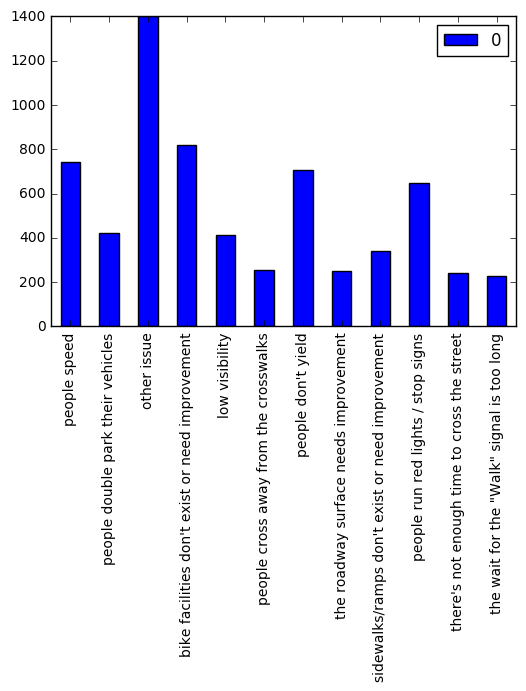

In [16]:
classcounts = Counter(data['REQUESTTYPE'])
targetdf = pd.DataFrame.from_dict(classcounts,orient='index')
targetdf.plot(kind='bar')

In [17]:
data2 = data[['COMMENTS','REQUESTTYPE']]
data2.reset_index(drop=True,inplace=True)
data.reset_index(drop=True,inplace=True)

# Task2 - Model 1 [10 points]

Run a baseline multi-class classification model using a bag-of-word approach, report macro f1-score (should be above .5) and visualize the confusion matrix. Can you interpret the mistakes made by the model? 

In [14]:
# Add your code for task 2 here. You may use multiple cells. 
X_train,X_test,y_train,y_test = train_test_split(data2['COMMENTS'],data2['REQUESTTYPE'],random_state=2)

In [15]:
vect = CountVectorizer(stop_words='english')
xvecttrain = vect.fit_transform(X_train)
xvecttest = vect.transform(X_test)

In [16]:
lr = LogisticRegression().fit(xvecttrain,y_train)
y_test_pred = lr.predict(xvecttest)
f1test = f1_score(y_test,y_test_pred,average='macro')
f1test
#F1 score: 56.876

0.56862913154292338

conf_mat table shows the confusion matrix. The classes on the rows are in the same order as they are in columns. We can clearly see that almost all request types are being missclassified as 'other issue' with very high frequency. We tried to build a model after removing 'other issues' and found that the score increased significantly. This implies that 'other issue' category is causing the detetrioration of the model and these other issues might actually be one of the other request types.

In [19]:
#confusion_matrix(y_test,y_test_pred).shape
np.unique(data2.REQUESTTYPE)

array(["bike facilities don't exist or need improvement", 'low visibility',
       'other issue', 'people cross away from the crosswalks',
       "people don't yield", 'people double park their vehicles',
       'people run red lights / stop signs', 'people speed',
       "sidewalks/ramps don't exist or need improvement",
       'the roadway surface needs improvement',
       'the wait for the "Walk" signal is too long',
       "there's not enough time to cross the street"], dtype=object)

In [20]:
confusion_matrix(y_test,y_test_pred)

array([[152,   2,  25,   0,   6,   4,   0,   8,   7,   4,   1,   0],
       [  0,  55,  22,   0,   9,   4,   3,   8,   0,   1,   0,   1],
       [ 25,  13, 190,   7,  27,  12,  15,  21,  17,   5,   7,   7],
       [  0,   2,  19,  19,   5,   0,   3,   3,   5,   0,   1,   2],
       [  8,  10,  43,   3,  84,   0,  13,   9,   2,   1,   1,   2],
       [ 10,   3,  21,   0,   0,  72,   2,   1,   1,   0,   0,   0],
       [  0,   4,  21,   1,  15,   0, 120,  14,   0,   0,   0,   4],
       [  6,   8,  14,   1,  14,   1,   5, 141,   1,   0,   0,   3],
       [  2,   1,  11,   1,   3,   0,   0,   4,  38,   1,   0,   3],
       [ 11,   0,   4,   2,   2,   2,   0,   0,   3,  33,   0,   0],
       [  1,   0,  10,   1,   2,   0,   0,   2,   0,   0,  37,   6],
       [  3,   3,  15,   5,   8,   0,   3,   1,   1,   0,   8,  13]])

In [14]:
conf_mat=pd.DataFrame(confusion_matrix(y_test,y_test_pred),columns=np.unique(data2.REQUESTTYPE))
conf_mat

,bike facilities don't exist or need improvement,low visibility,other issue,people cross away from the crosswalks,people don't yield,people double park their vehicles,people run red lights / stop signs,people speed,sidewalks/ramps don't exist or need improvement,the roadway surface needs improvement,"the wait for the ""Walk"" signal is too long",there's not enough time to cross the street
0,152,2,25,0,6,4,0,8,7,4,1,0
1,0,55,22,0,9,4,3,8,0,1,0,1
2,25,13,190,7,27,12,15,21,17,5,7,7
3,0,2,19,19,5,0,3,3,5,0,1,2
4,8,10,43,3,84,0,13,9,2,1,1,2
5,10,3,21,0,0,72,2,1,1,0,0,0
6,0,4,21,1,15,0,120,14,0,0,0,4
7,6,8,14,1,14,1,5,141,1,0,0,3
8,2,1,11,1,3,0,0,4,38,1,0,3
9,11,0,4,2,2,2,0,0,3,33,0,0


In [18]:
# Tried RF as well. No improvement over logistic regression
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit(xvecttrain,y_train)
y_test_pred_rf = rf.predict(xvecttest)
print(f1_score(y_test,y_test_pred_rf,average='macro'))

0.48613110338


# Task3 - Model 2 [30 points]

Improve the model using more complex text features, including n-grams, character n-grams and possibly domain-specific features.
We tried following things to improve our models:

1. n grams: 1 gram works the best
2. character n-gram: worse results
3. We lemmatized the words: F1 score increased by 0.02
4. Used TF IDF vectorizor: no improvement
5. Tried negation handling as well: no improvement

We have included the code for lemmatization only. Since, other methods didn't improve the score, we haven't included those codes here.

In [19]:
# Add your code for task 3 here. You may use multiple cells. 
from nltk.stem import PorterStemmer
ps = PorterStemmer()
import nltk
nltk.download('punkt')
from nltk import word_tokenize,sent_tokenize

[nltk_data] Downloading package punkt to C:\Users\Abhay
[nltk_data]     Pawar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [21]:
for i in range(len(data2['COMMENTS'])):
    temp = ''
    words = word_tokenize(data2['COMMENTS'][i])
    for w in words:
        temp= temp + ps.stem(w) + ' '
    data2.set_value(i,'COMMENTS',temp)

In [22]:
X_train,X_test,y_train,y_test = train_test_split(data2['COMMENTS'],data2['REQUESTTYPE'],random_state=7)
vect = CountVectorizer(stop_words='english')
xvecttrain = vect.fit_transform(X_train)
xvecttest = vect.transform(X_test)


F1 score increased by 0.02 after lemmatization.

In [23]:
lr = LogisticRegression().fit(xvecttrain,y_train)
y_test_pred_final = lr.predict(xvecttest)
f1test_lemm = f1_score(y_test,y_test_pred_final,average='macro')
f1test_lemm

0.58898579184036459

# Task4 - Visualize Results [10 points]

Visualize results of the tuned model (classification results, confusion matrix, important features, example mistakes).

In [24]:
# Add your code for task 4 here. You may use multiple cells. 
conf_mat=pd.DataFrame(confusion_matrix(y_test,y_test_pred_final),columns=np.unique(data2.REQUESTTYPE))
conf_mat

,bike facilities don't exist or need improvement,low visibility,other issue,people cross away from the crosswalks,people don't yield,people double park their vehicles,people run red lights / stop signs,people speed,sidewalks/ramps don't exist or need improvement,the roadway surface needs improvement,"the wait for the ""Walk"" signal is too long",there's not enough time to cross the street
0,168,2,26,0,2,3,0,7,2,8,0,1
1,5,56,20,0,6,1,5,5,2,1,0,0
2,26,13,166,8,34,13,28,17,10,3,2,1
3,1,3,13,42,10,2,1,1,2,0,2,2
4,9,2,46,2,85,3,13,12,4,0,2,3
5,5,2,15,0,0,88,2,2,0,0,0,0
6,1,2,22,0,9,0,114,7,0,0,2,0
7,5,9,17,1,4,1,11,117,2,0,0,2
8,2,2,20,3,1,1,1,6,49,2,0,1
9,7,1,13,1,1,0,0,1,2,34,0,1


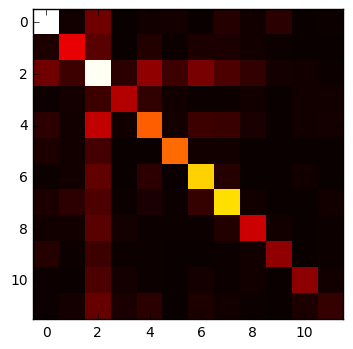

In [25]:
#The following heat map shows a lot requests getting classified as 'other issue' and vice versa. The third column and row 
#corresponds to 'other issue'
plt.imshow(confusion_matrix(y_test,y_test_pred_final), cmap='hot', interpolation='nearest')

In [26]:
#Folllowing are some of the comments which have been missclassified. Looking at other issue comments, we can clearly see that
#these issues can be relabeled as one of the other request types. Following are some examples which show
i=0
data2.COMMENTS[np.where(np.logical_and(y_test!='other issue',y_test_pred_final!='other issue'))[0]][i]

u'Broadway Bridg is wide & off highway ramp . Vehicl speed over . Key connect for bike ( & everyon ) to get back into Southi fr much of citi . W.Broadway is wide enough for bike lane all the way across thi bridg down to at least E.Broadway . '

# Task5 - Clustering [10 points]

Apply LDA, NMF and K-Means to the whole dataset. Can you find clusters or topics that match well with some of the ground truth labels? Use ARI to compare the methods and visualize topics and clusters.

In [27]:
# Add your code for task 5 here. You may use multiple cells. 
from sklearn.decomposition import NMF
nmf = NMF(n_components=12,verbose=10,tol=0.01)
nmf.fit(xvecttrain)

violation: 1.0
violation: 0.514327099768
violation: 0.418218528642
violation: 0.258612821474
violation: 0.137673060759
violation: 0.0912733293957
violation: 0.0698466724968
violation: 0.0527461226153
violation: 0.0350200311911
violation: 0.0226432858076
violation: 0.0149170211001
violation: 0.0102778303972
violation: 0.00743047894039
Converged at iteration 13


NMF(alpha=0.0, beta=1, eta=0.1, init=None, l1_ratio=0.0, max_iter=200,
  n_components=12, nls_max_iter=2000, random_state=None, shuffle=False,
  solver='cd', sparseness=None, tol=0.01, verbose=10)

In [28]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_topics=12, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(xvecttrain)


In [29]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print( " ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [30]:
display_topics(nmf,vect.get_feature_names(),10)

Topic 0:
cross pedestrian walk crosswalk signal time veri yield wait danger
Topic 1:
lane right traffic left straight onli mark driver merg travel
Topic 2:
turn left right make ave straight driver green arrow onli
Topic 3:
street way speed sidewalk narrow drive use wrong cut fast
Topic 4:
car come speed pedestrian hit veri danger becau block road
Topic 5:
thi intersect danger road area need veri traffic way speed
Topic 6:
stop sign driver crosswalk bu intersect yield way need hit
Topic 7:
peopl speed drive crosswalk veri road walk yield fast lot
Topic 8:
st traffic washington need way ave speed come crosswalk south
Topic 9:
light red run traffic green time intersect ave driver long
Topic 10:
park doubl traffic make lot vehicl block difficult alway truck
Topic 11:
bike need path danger ave safe facil ride veri sidewalk


In [31]:
display_topics(lda,vect.get_feature_names(),10)

Topic 0:
walnut mile taxi 40 marlborough invit villag corinth half impun
Topic 1:
valet hotel sen restaur pothol passeng cab park ticket ruggl
Topic 2:
way sidewalk drive wrong peopl curb street fast narrow cut
Topic 3:
mass ave ramp path bike river terribl corridor sw walk
Topic 4:
cross light pedestrian car thi turn stop peopl street crosswalk
Topic 5:
crawford margin homestead ruthven humboldt deliv pleasanton vale orlean perimet
Topic 6:
facil bridg bike station commut rail safe center connect mt
Topic 7:
broken shawmut glass trash clean pile ft court 45 whip
Topic 8:
ppl alley privat bolton smoke smell shower rebar especiali deck
Topic 9:
snow shovel rain flood otherwi respon 2016 dip disabl orient
Topic 10:
park truck doubl stop car deliveri store drop sign alway
Topic 11:
lane bike park car thi street traffic turn peopl road


In [32]:
nmfarray = nmf.transform(xvecttrain)
ldaarray = lda.transform(xvecttrain)

violation: 1.0
violation: 0.11531637381
violation: 0.00305832081832
Converged at iteration 3


In [33]:
topicsnmf = {}
for i in range(len(nmfarray)):
    topicsnmf[i] = np.where(nmfarray[i]==np.max(nmfarray[i]))[0][0]
topicsnmf = np.array(topicsnmf.values())

In [34]:
topicslda = {}
for i in range(len(ldaarray)):
    topicslda[i] = np.where(ldaarray[i]==np.max(ldaarray[i]))[0][0]
topicslda = np.array(topicslda.values())

The plots in the following cell (ignore the first plot) show how the request types are distributed within the clusters found by LDA and NMF. The comment is assigned to a topic for which it has maximum weight. In the plots, we can clearly see some request types falling in specific topics. Thus, we can say that this topic is the respective request type. We also tried to see if any of the request types can be clubbed together. To check this, we saw if any two request types figure in topics together. We didn't find any such request types.

Also, 'other issue' can be seen in almost all the topics. This implies that 'other issue' can be relabeled as on of the other types. For this we can do clustering on only the non-'other issue' records and use that model to relabel 'other issue' request types.

Topics 7,9,10,11 align well with only one request types after ignoring 'other issue'

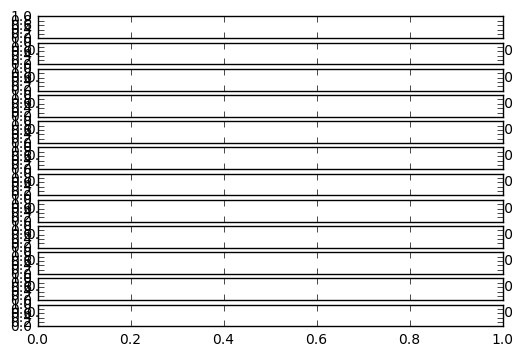

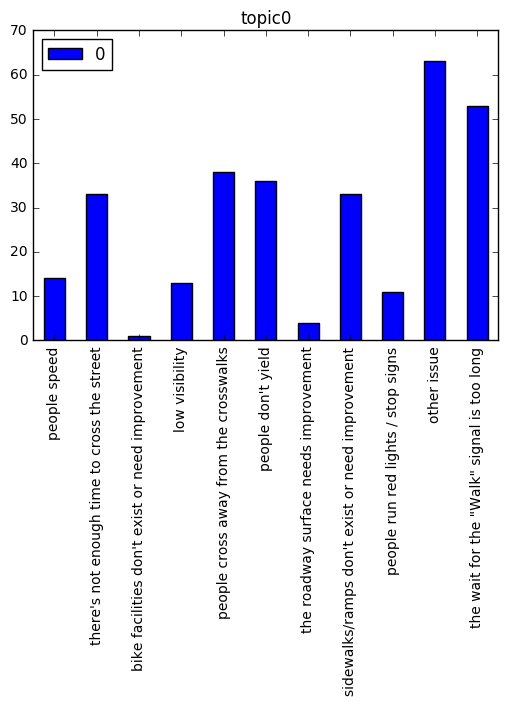

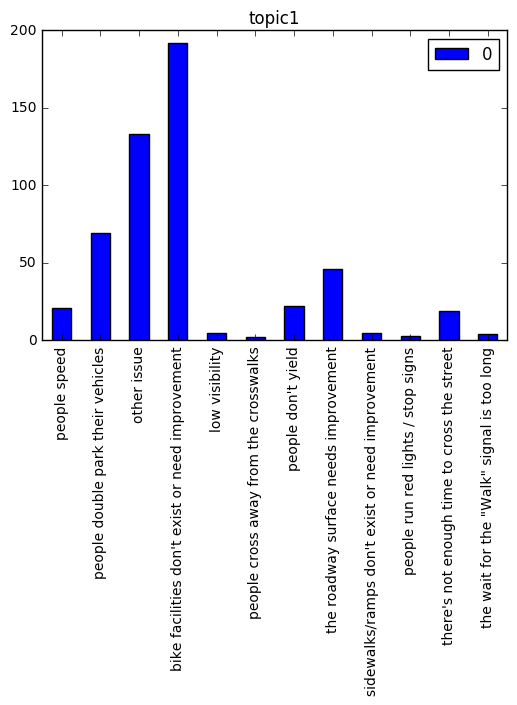

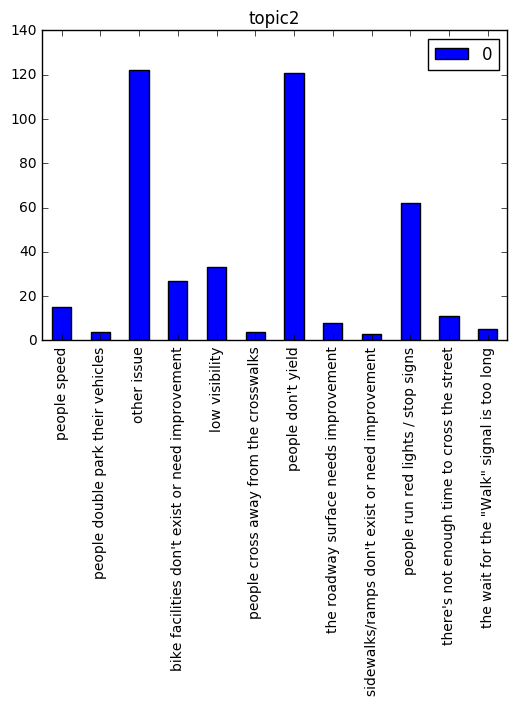

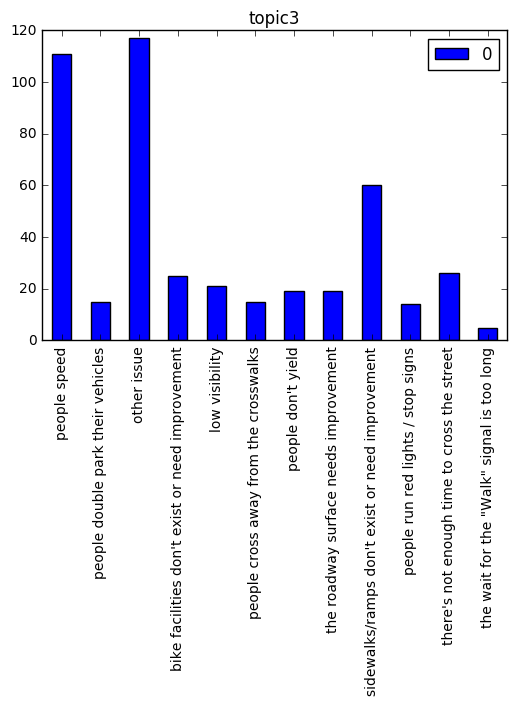

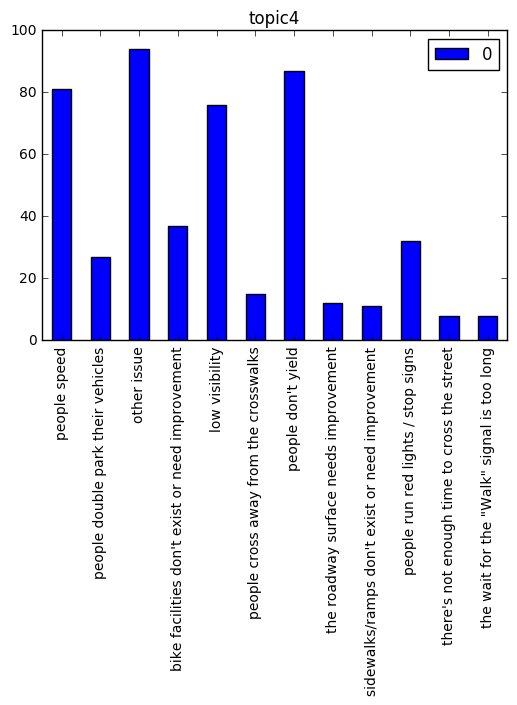

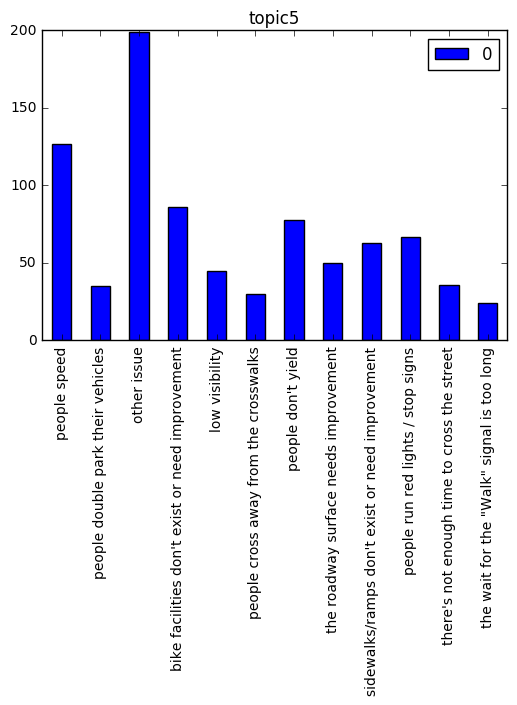

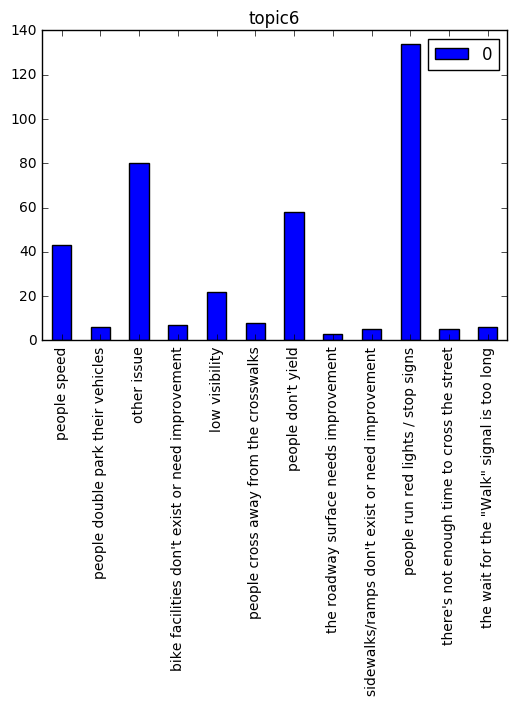

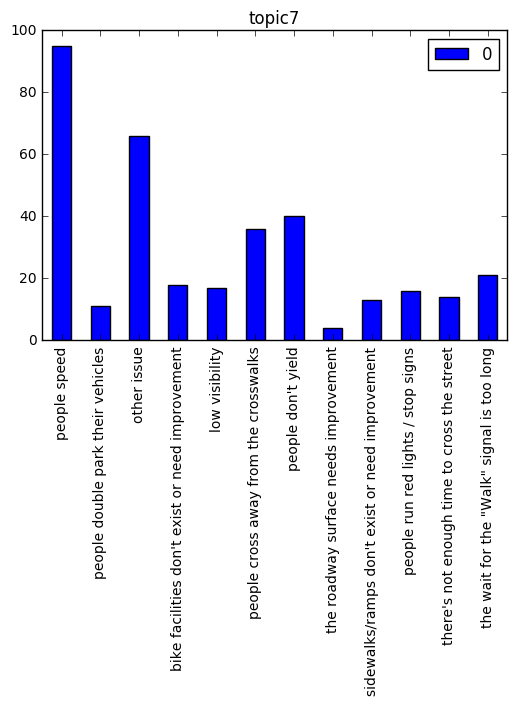

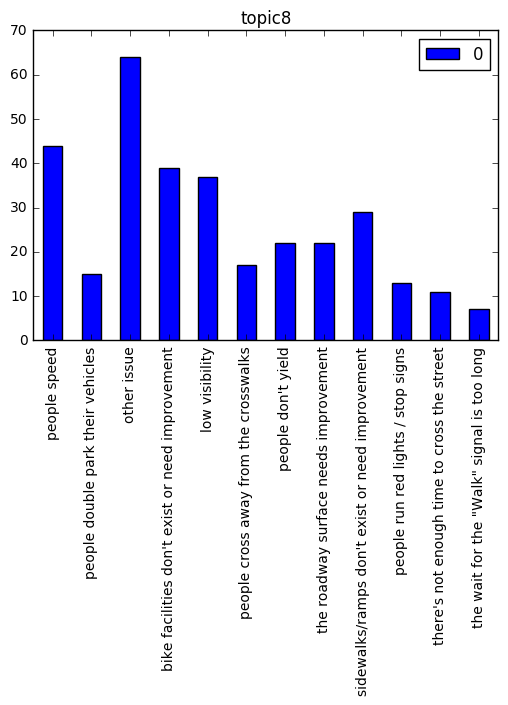

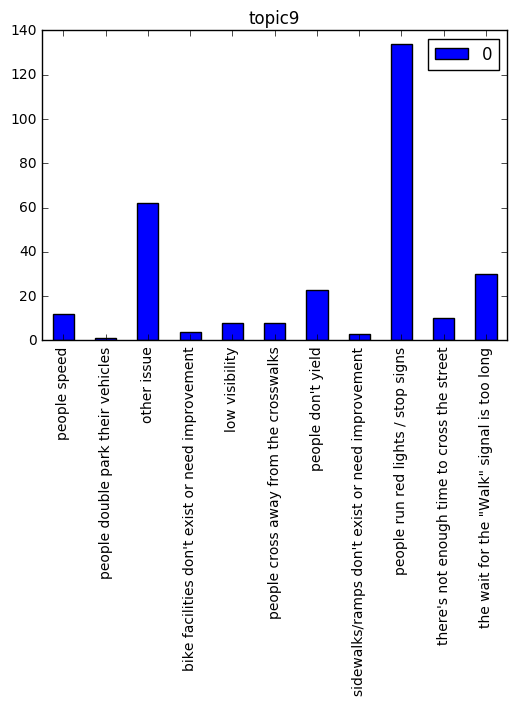

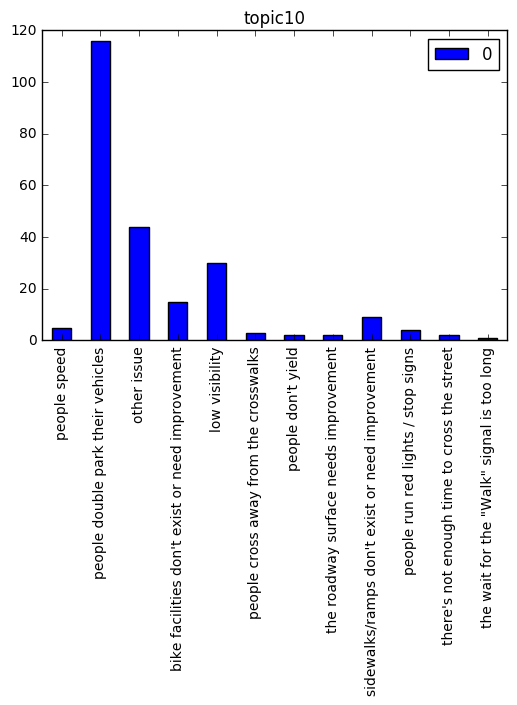

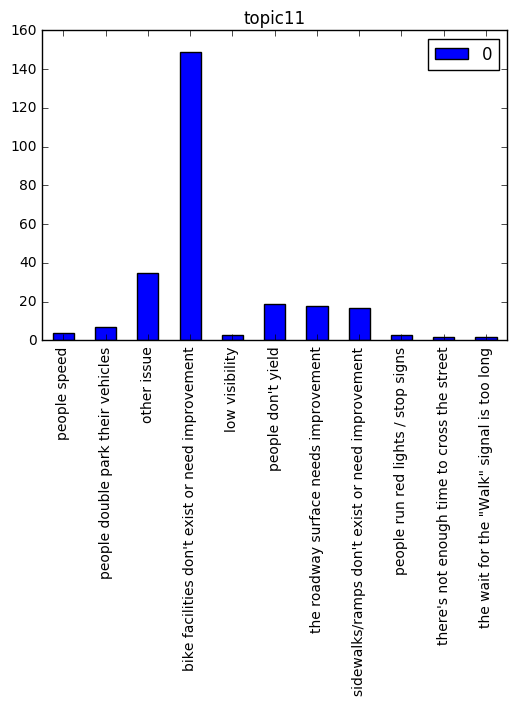

In [35]:
f,ax = plt.subplots(12)
for i in range(12):
    topic = y_train.iloc[np.where(topicsnmf == i)]
    classcounts = Counter(topic)
    targetdf = pd.DataFrame.from_dict(classcounts,orient='index')
    ax[i] = targetdf.plot(kind='bar')
    ax[i].set_title("topic" + str(i))


In [37]:
from sklearn.metrics import adjusted_rand_score
arinmf = adjusted_rand_score(y_train,topicsnmf)
arilda = adjusted_rand_score(y_train,topicslda)
print(arinmf)
print(arilda)

0.0532896653859
0.0537447864888


K Means clustering for finding topics/groups

In [38]:
from sklearn.cluster import KMeans
n_clusters=12
kmeans = KMeans(n_clusters,random_state = 0).fit_predict(xvecttrain)
print(adjusted_rand_score(y_train,kmeans))

0.0553935882784


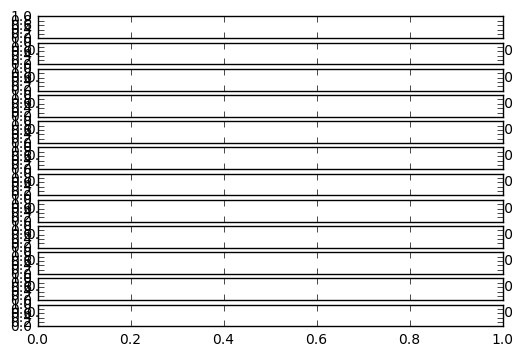

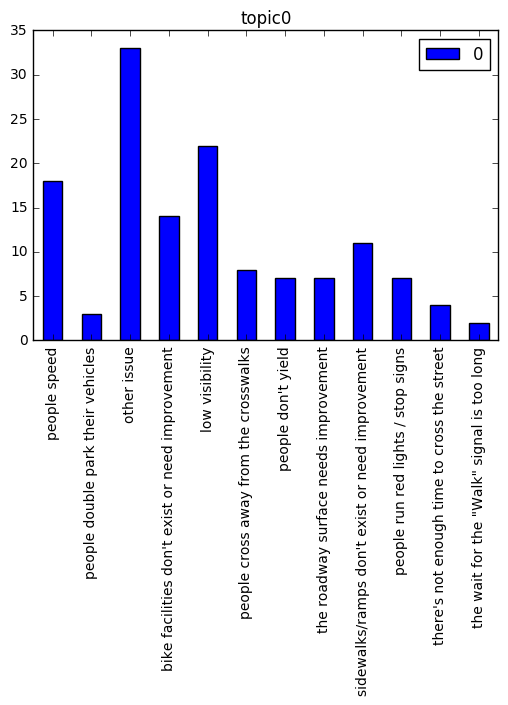

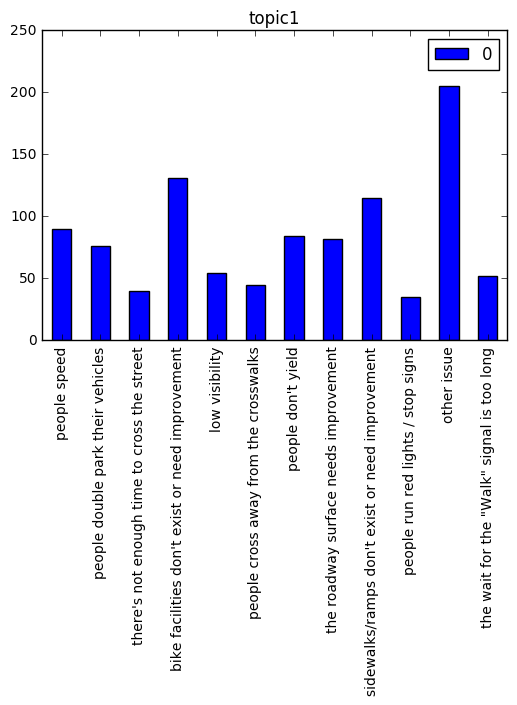

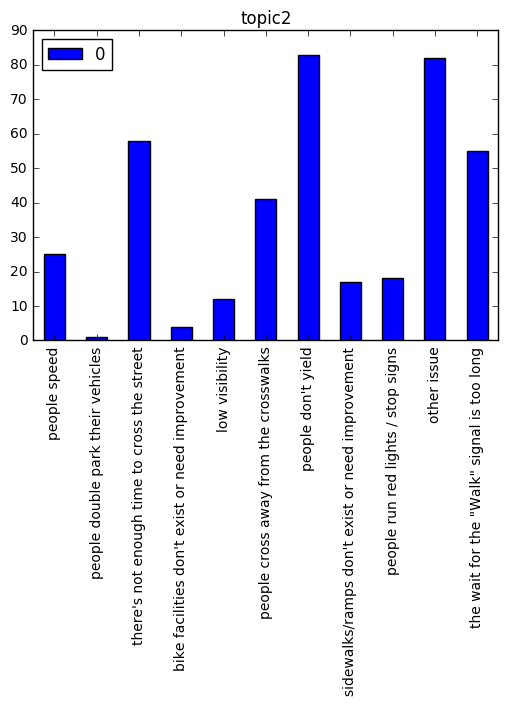

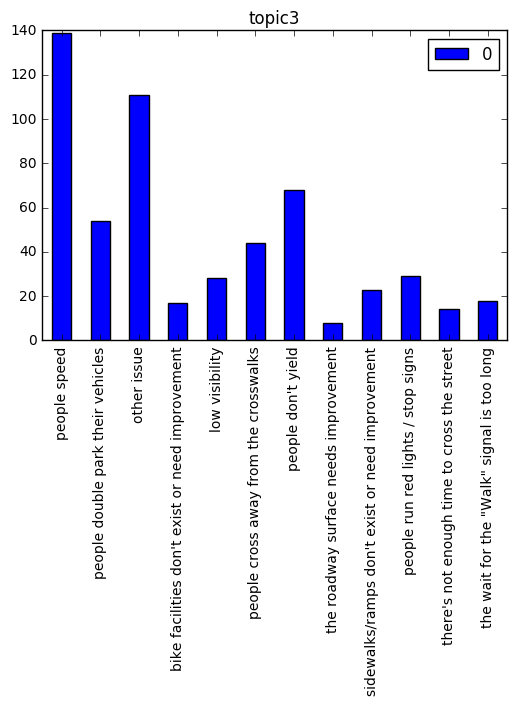

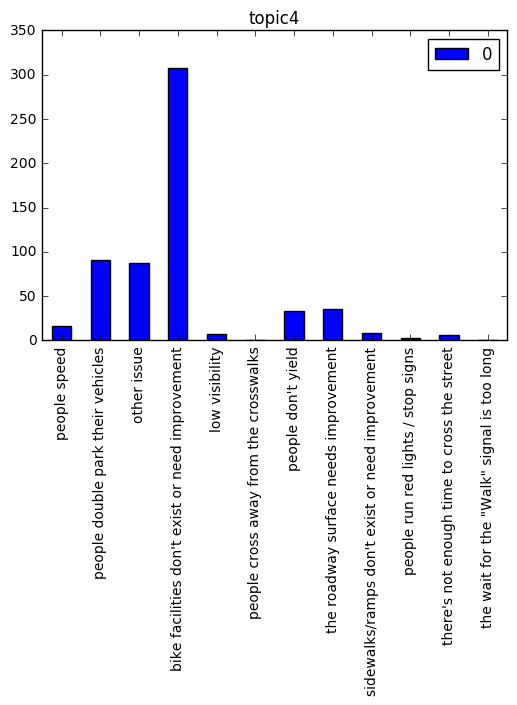

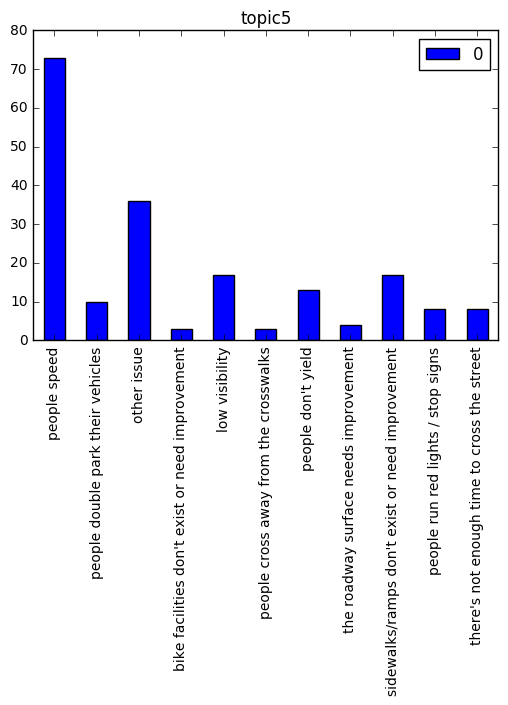

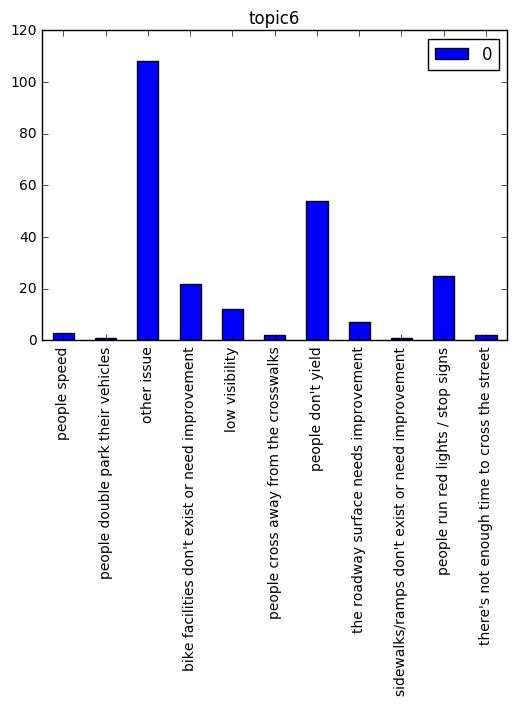

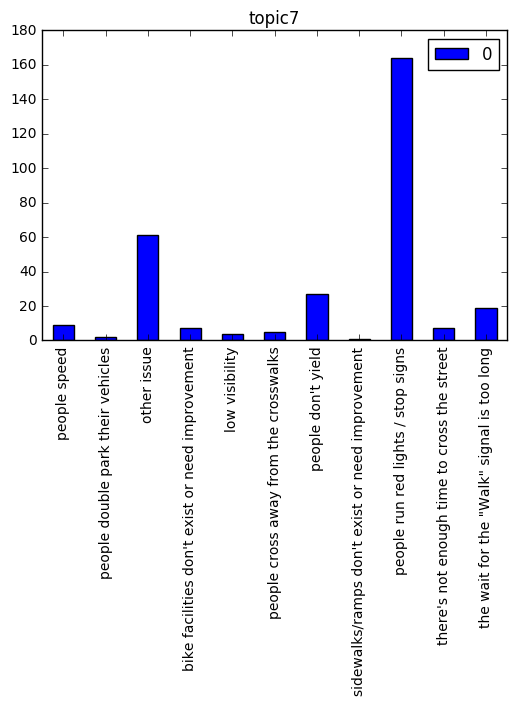

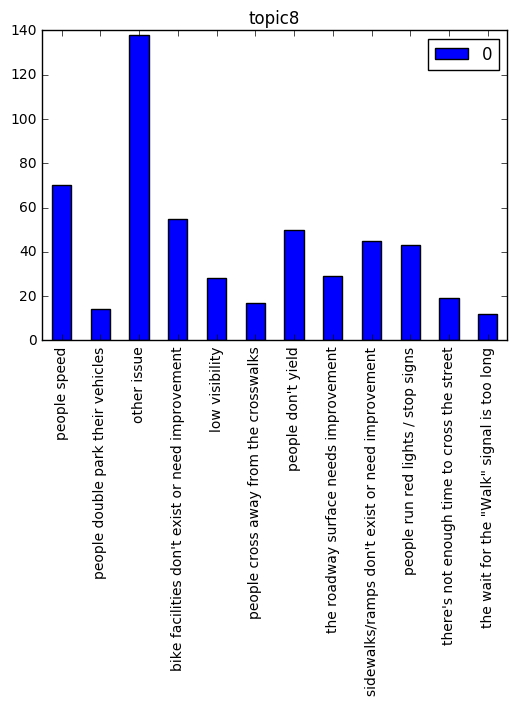

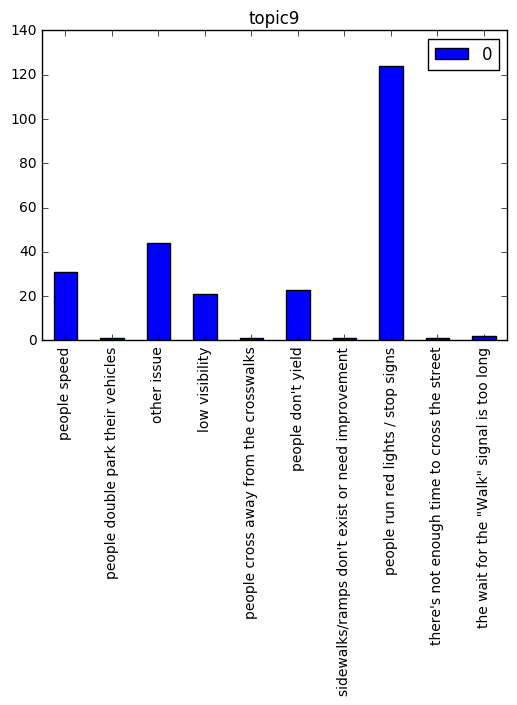

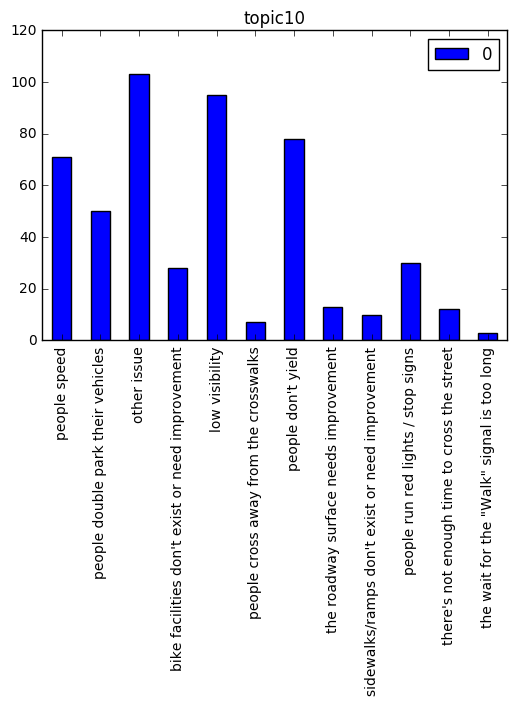

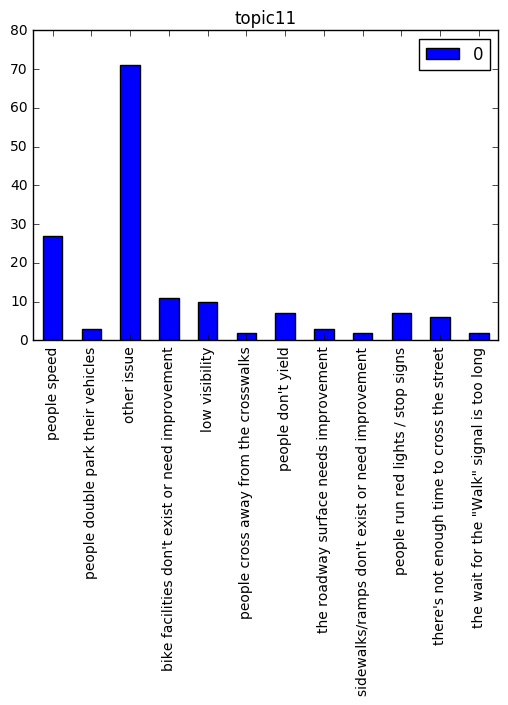

In [39]:
f,ax = plt.subplots(n_clusters)
for i in range(n_clusters):
    topic = y_train.iloc[np.where(kmeans == i)]
    classcounts = Counter(topic)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
    targetdf = pd.DataFrame.from_dict(classcounts,orient='index')
    ax[i] = targetdf.plot(kind='bar')
    ax[i].set_title("topic" + str(i))

# Task6 - Model 3 [30 points]

Improve the class definition for REQUESTTYPE by using the results of the clustering and results of the previous classification model. Re-assign labels using either the results of clustering or using keywords that you found during data exploration. The labels must be semantically meaningful.
The data has a large “other” category. Apply the topic modeling and clustering techniques to this subset of the data to find possible splits of this class.
Report accuracy using macro average f1 score (should be above .53) 


Out of LDA, NMF and k-means, LDA has the highest ARI. But, lot of request types are found in the same topic. K-means shows a good differentiation. NMF also has some topics which are exclusively dominated by one of the request types after ignoring the other-issue type. 

We tried to infer the label of 'other issue' using these techniques. We assigned 'other issues' to the request type that was most significant in the topic to which the 'other issue' belonged to. We the NMF results for this task, as NMF has some topics corresponding well with some request types. We then used this data to re-build the data and got some minor improvement .

In [40]:
# fulldata clustering
#X_train,X_test,y_train,y_test = train_test_split(data2['COMMENTS'],data2['REQUESTTYPE'],random_state=2)

for i in range(n_clusters):
    topic = y_train.iloc[np.where(topicsnmf == i)]
    classcounts = Counter(topic)
    if(max(classcounts, key=classcounts.get))!= "other issue":
        temp = y_train.iloc[np.where(topicsnmf == i)].copy()
        temp[temp=="other issue"] = max(classcounts, key=classcounts.get)
        y_train.iloc[np.where(topicsnmf == i)] = temp
    else:
        temp = y_train.iloc[np.where(topicsnmf == i)].copy()
        del classcounts["other issue"]
        temp[temp=="other issue"] = max(classcounts, key=classcounts.get)
        y_train.iloc[np.where(topicsnmf == i)] = temp

        
nmftest = nmf.transform(xvecttest)


topicsnmftest = {}
for i in range(len(nmftest)):
    topicsnmftest[i] = np.where(nmftest[i]==np.max(nmftest[i]))[0][0]
topicsnmftest = np.array(topicsnmftest.values())

for i in range(n_clusters):
    topic = y_test.iloc[np.where(topicsnmftest == i)]
    classcounts = Counter(topic)
    if(max(classcounts, key=classcounts.get))!= "other issue":
        temp = y_test.iloc[np.where(topicsnmftest == i)].copy()
        temp[temp=="other issue"] = max(classcounts, key=classcounts.get)
        y_test.iloc[np.where(topicsnmftest == i)] = temp
    else:
        temp = y_test.iloc[np.where(topicsnmftest == i)].copy()
        del classcounts["other issue"]
        temp[temp=="other issue"] = max(classcounts, key=classcounts.get)
        y_test.iloc[np.where(topicsnmftest == i)] = temp

violation: 1.0
violation: 0.114633393878
violation: 0.00308925220914
Converged at iteration 3


In [41]:
lr = LogisticRegression().fit(xvecttrain,y_train)
y_test_pred = lr.predict(xvecttest)
f1test_other = f1_score(y_test,y_test_pred,average='macro')
f1test_other
assert f1test_other>0.57

0.58650114673521225

# Extra Credit [Up to +20 points]

Use a word embedding representation like word2vec for step 3 and or step 6. 

We tried step 3 using word embeddings. We first tried the pre-trained vectors from Glove. But, that didn't give good results. Then we trained our vectors using gensim. After training, we took sum of the vectors of all the words in a sentence to get the vector representation of that comment. We trained the model to give 100 dimensional vectors. Finally, we F1 score in the range of 0.52 to 0.53

In [27]:
# Add your code for extra credit here. You may use multiple cells. 
len(data)

6461

In [28]:
data['COMMENTS_clean']=data['COMMENTS'].copy()
#Splitting into multiple cells so that travis doesn't show cell execution time out

for i in range(2100):
    words = word_tokenize(data['COMMENTS'][i])
    temp=''
    for w in words:
        if w.lower() not in stopwords.words('english'):
            temp= temp + w + ' ' #ps.stem(w)
    data.set_value(i,'COMMENTS_clean',temp)

In [29]:
for i in range(2100,4200):
    words = word_tokenize(data['COMMENTS'][i])
    temp=''
    for w in words:
        if w.lower() not in stopwords.words('english'):
            temp= temp + w + ' ' #ps.stem(w)
    data.set_value(i,'COMMENTS_clean',temp)

In [30]:
for i in range(4200,len(data)):
    words = word_tokenize(data['COMMENTS'][i])
    temp=''
    for w in words:
        if w.lower() not in stopwords.words('english'):
            temp= temp + w + ' ' #ps.stem(w)
    data.set_value(i,'COMMENTS_clean',temp)

In [31]:
for i in range(len(data)):
    words = word_tokenize(data['COMMENTS_clean'][i])
    temp=''
    for w in words:
        if w[0] not in ['0','1','2','3','4','5','6','7','8','9']:
            temp= temp + w + ' ' #ps.stem(w)
    data.set_value(i,'COMMENTS_clean',temp)

In [32]:
for i in range(len(data)):
    words = word_tokenize(data['COMMENTS_clean'][i])
    temp=''
    for w in words:
        if w not in ['!','@','#','$','%','^','&','*','(',')','-','+','=','_','/','?',',',':',';','.','<','>','|']:
            temp= temp + w + ' '
    data.set_value(i,'COMMENTS_clean',temp)

In [33]:
for i in range(len(data)):
    if i==0:
        temp=[data["COMMENTS_clean"][0].lower().split(' ')]
    else:
        string=data["COMMENTS_clean"][i].lower()
        temp.append(string.strip().split(' '))

In [34]:
models = gensim.models.Word2Vec(temp, min_count=5)
vectors=np.zeros((len(temp),100))
for i in range(len(temp)):
    vec=np.zeros(100)
    n=0
    for words in temp[i]:
        try:
            vec=vec+models[words]
            n=n+1
        except:
            continue
    if n==0:
        vectors[i]=vec
    else:
        vectors[i]=vec/n        
#vectors

In [36]:
X_train,X_test,y_train,y_test = train_test_split(vectors,data['REQUESTTYPE'],random_state=2)
lr = LogisticRegression(C=100000)
lr.fit(X_train,y_train)

y_test_pred = lr.predict(X_test)
f1test = f1_score(y_test,y_test_pred,average='macro')
f1test
#f score= 51.04
#Tried regularizing the features as well. It gave worse results

0.51043340568255957

In [37]:
svm=SVC(C=1000,kernel='rbf',gamma=0.9)

svm.fit(X_train,y_train)
y_test_pred=svm.predict(X_test)

f1test = f1_score(y_test,y_test_pred,average='macro')
f1test


0.51721372443256175